In [3]:
import matplotlib.pyplot as plt


In [4]:
def color_dict():
    tissues = ['Bladder','Brain_Myeloid','Brain_Non-Myeloid','Fat','Heart_and_Aorta','Kidney','Large_Intestine','Limb_Muscle','Liver','Lung','Mammary_Gland','Marrow','Pancreas','Skin','Spleen','Thymus','Tongue','Trachea','BAT', 'GAT', 'MAT', 'SCAT']
    
    import matplotlib.colors as pltcolors
    cmap = plt.cm.get_cmap("tab20b")

    color_dict = {}
    i=0
    for t in tissues:
        color_dict[t] = pltcolors.to_hex(cmap(i))
        i+=1/len(tissues)
    return color_dict

maca_color_dict = color_dict()

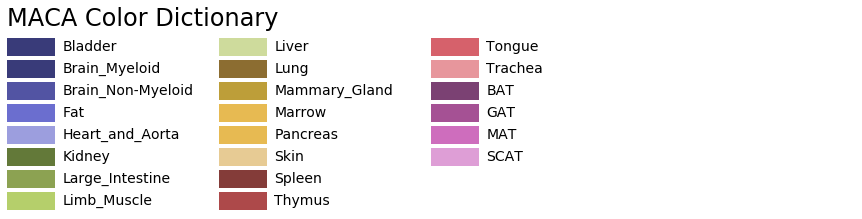

In [8]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = [(v, k) for k, v in colors.items()]
    
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(maca_color_dict, "MACA Color Dictionary", sort_colors=False, emptycols=1)
plt.savefig('./maca_color_dict.pdf')